# An Empirical Comparison of Supervised and Self-Supervised Learning

In [61]:
import tqdm
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

from sklearn.svm import SVC
from sklearn.manifold import TSNE

from train import train_encoder, train_ConvNet, TrainArgs
from test import encode_data, plot_tsne, test_conv

from torch.utils.data import Subset

In [62]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Baseline: convolutional neural network

In [63]:
conv_args = TrainArgs(batchsize = 10)

In [64]:
ConvNet, conv_losses = train_ConvNet(conv_args)

Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.300
[epoch: 0, i:   999] avg mini-batch loss: 2.285
[epoch: 0, i:  1499] avg mini-batch loss: 2.232
[epoch: 0, i:  1999] avg mini-batch loss: 2.162
[epoch: 0, i:  2499] avg mini-batch loss: 2.136
[epoch: 0, i:  2999] avg mini-batch loss: 2.071
[epoch: 0, i:  3499] avg mini-batch loss: 2.040
[epoch: 0, i:  3999] avg mini-batch loss: 1.982
[epoch: 0, i:  4499] avg mini-batch loss: 1.946
[epoch: 0, i:  4999] avg mini-batch loss: 1.871
[epoch: 1, i:   499] avg mini-batch loss: 1.810
[epoch: 1, i:   999] avg mini-batch loss: 1.765
[epoch: 1, i:  1499] avg mini-batch loss: 1.721
[epoch: 1, i:  1999] avg mini-batch loss: 1.616
[epoch: 1, i:  2499] avg mini-batch loss: 1.625
[epoch: 1, i:  2999] avg mini-batch loss: 1.573
[epoch: 1, i:  3499] avg mini-batch loss: 1.552
[epoch: 1, i:  3999] avg mini-batch loss: 1.536
[epoch: 1, i:  4499] avg mini-batch loss: 1.526
[epoch: 1, i:  4999] avg mini-batc

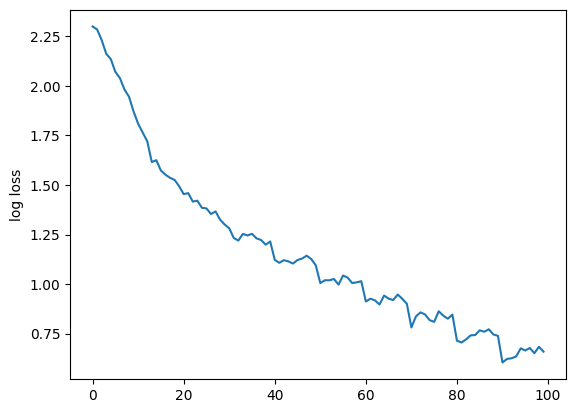

In [65]:
plt.plot(conv_losses);
plt.ylabel('log loss');

In [66]:
print(f'Baseline accuracy of the convolutional model is {test_conv(ConvNet)*100} %')

Files already downloaded and verified
Baseline accuracy of the convolutional model is 65.78 %


## Momentum Contrast

### Pre-Training the Encoder

In [67]:
encoder_args = TrainArgs(epochs = 20)

In [68]:
encoder, enc_losses = train_encoder(encoder_args)

Files already downloaded and verified
Files already downloaded and verified
Train Epoch: 1 	Loss: 0.060902
Train Epoch: 2 	Loss: 0.046762
Train Epoch: 3 	Loss: 0.035120
Train Epoch: 4 	Loss: 0.027146
Train Epoch: 5 	Loss: 0.021109
Train Epoch: 6 	Loss: 0.016860
Train Epoch: 7 	Loss: 0.013692
Train Epoch: 8 	Loss: 0.011596
Train Epoch: 9 	Loss: 0.010029
Train Epoch: 10 	Loss: 0.008807
Train Epoch: 11 	Loss: 0.007798
Train Epoch: 12 	Loss: 0.006925
Train Epoch: 13 	Loss: 0.006179
Train Epoch: 14 	Loss: 0.005520
Train Epoch: 15 	Loss: 0.005040
Train Epoch: 16 	Loss: 0.004647
Train Epoch: 17 	Loss: 0.004221
Train Epoch: 18 	Loss: 0.003957
Train Epoch: 19 	Loss: 0.003703
Train Epoch: 20 	Loss: 0.003495


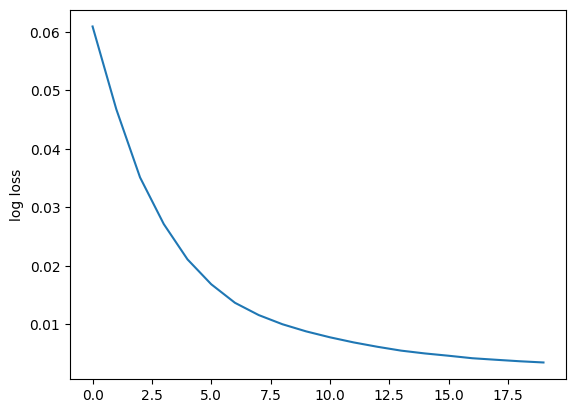

In [69]:
plt.plot(enc_losses);
plt.ylabel('log loss');

### Visualizing Embeddings

To do:
1. Implement multiple training ratios
2. Hyperparameter tuning?
3. Plot the loss functions

In [70]:
data, targets = encode_data()

Files already downloaded and verified


  1%|          | 122/10000 [00:01<02:13, 74.05it/s]

100%|██████████| 10000/10000 [01:57<00:00, 85.05it/s]


In [71]:
ret = TSNE(n_components=2, random_state=0, n_jobs=8).fit_transform(data)

Files already downloaded and verified


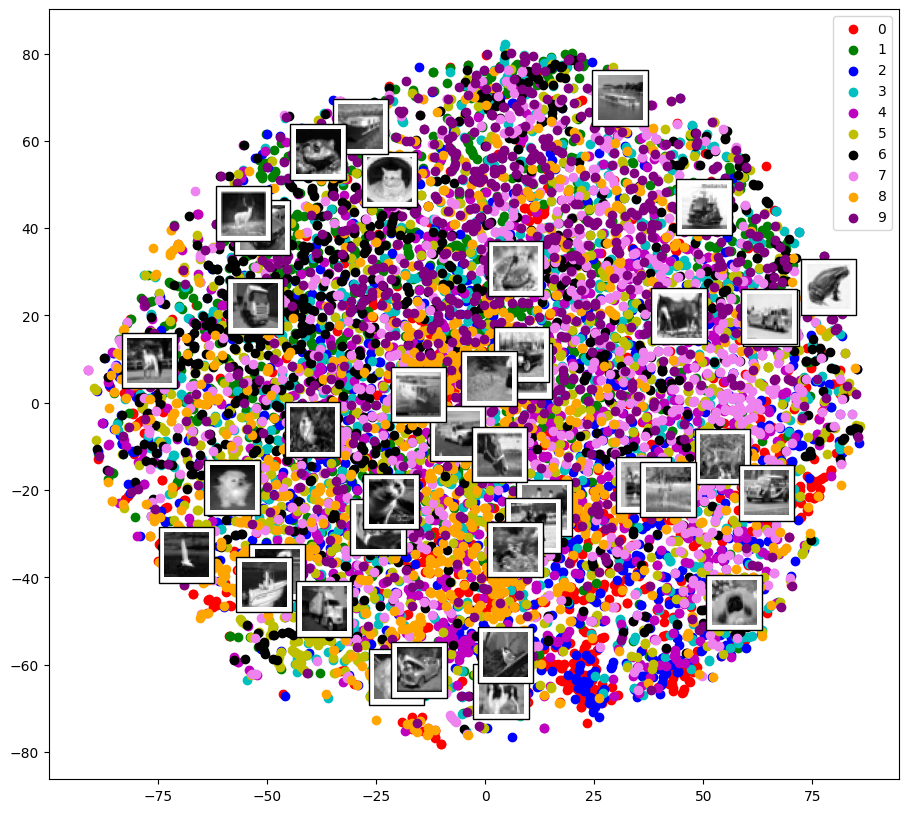

In [72]:
plot_tsne(targets, ret)

### Training SVM on freezed features

In [73]:
X_train, y_train = encode_data(train=True)
X_test, y_test = encode_data(train=False)

Files already downloaded and verified


  0%|          | 62/50000 [00:00<09:44, 85.44it/s]

 99%|█████████▊| 49339/50000 [10:07<05:08,  2.14it/s]IOStream.flush timed out
IOStream.flush timed out
100%|██████████| 50000/50000 [10:35<00:00, 78.74it/s]


Files already downloaded and verified


100%|██████████| 10000/10000 [01:56<00:00, 85.62it/s]


In [74]:
svm = SVC(C = 100,  gamma='scale')
svm.fit(X_train, y_train)

SVC(C=100)

In [75]:
svm.score(X_test, y_test)

0.4891

### Multiple Runs

In [76]:
# subsample so things run faster
X_train, y_train = encode_data(train=True, subsample = True)
X_test, y_test = encode_data(train=False, subsample = True)

Files already downloaded and verified


100%|██████████| 5000/5000 [01:00<00:00, 82.03it/s]


Files already downloaded and verified


100%|██████████| 1000/1000 [00:12<00:00, 80.29it/s]


In [77]:
conv_args = TrainArgs(batchsize = 10, epochs = 5)

In [78]:
n = 3
conv_errors = []
svm_errors = []
for i in range(n):
    ConvNet, conv_losses = train_ConvNet(conv_args, subsample=True)
    conv_errors.append(test_conv(ConvNet, subsample=True)*100)
    
    svm = SVC(C = 100,  gamma='scale')
    svm.fit(X_train, y_train)   
    svm_errors.append(svm.score(X_test, y_test))

Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.302
[epoch: 1, i:   499] avg mini-batch loss: 2.296
[epoch: 2, i:   499] avg mini-batch loss: 2.279
[epoch: 3, i:   499] avg mini-batch loss: 2.227
[epoch: 4, i:   499] avg mini-batch loss: 2.158
Files already downloaded and verified
Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.303
[epoch: 1, i:   499] avg mini-batch loss: 2.302
[epoch: 2, i:   499] avg mini-batch loss: 2.302
[epoch: 3, i:   499] avg mini-batch loss: 2.301
[epoch: 4, i:   499] avg mini-batch loss: 2.300
Files already downloaded and verified
Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.302
[epoch: 1, i:   499] avg mini-batch loss: 2.297
[epoch: 2, i:   499] avg mini-batch loss: 2.276
[epoch: 3, i:   499] avg mini-batch loss: 2.199
[epoch: 4, i:   499] avg mini-batch loss: 2.142
Files already downloaded and verified


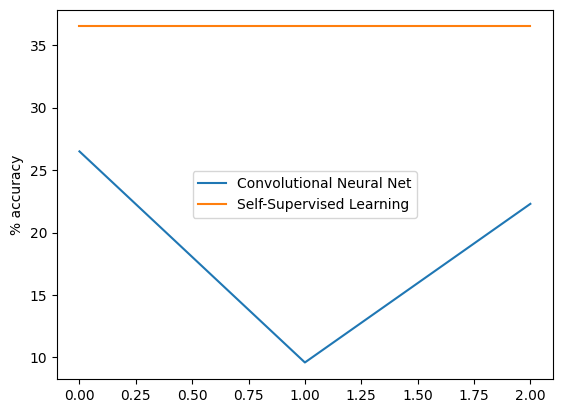

In [79]:
plt.plot(np.array(conv_errors), label="Convolutional Neural Net")
plt.plot(np.array(svm_errors)*100, label="Self-Supervised Learning")
plt.legend()
plt.ylabel('% accuracy')
plt.savefig('./results/comparison.png')

In [80]:
conv_errors

[26.5, 9.6, 22.3]

In [81]:
svm_errors

[0.365, 0.365, 0.365]

In [82]:
conv_errors

[26.5, 9.6, 22.3]